In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from funcs.pipe import extract

from astropy.io import fits

In [25]:

flux_label = r"Flux [e$^{-}$/s]"
time_label = "Time [BJD]"
files = np.loadtxt("files.txt", dtype=str)

# read the flare table
flares = pd.read_csv("../results/cheops_flares.csv")

In [26]:

dlcs = []
for pi, file in files:
    location = f"../data/hip67522/pipe_HIP67522/HIP67522_{file}{pi}_detrended_lc.csv"
    dlcs.append(pd.read_csv(location))
 
# make a list of the first time stamp in each lc in lcs
t0s = [lc["time"].min() for lc in dlcs]

sorting = np.argsort(t0s)

dlcs = [dlcs[i] for i in sorting]


21


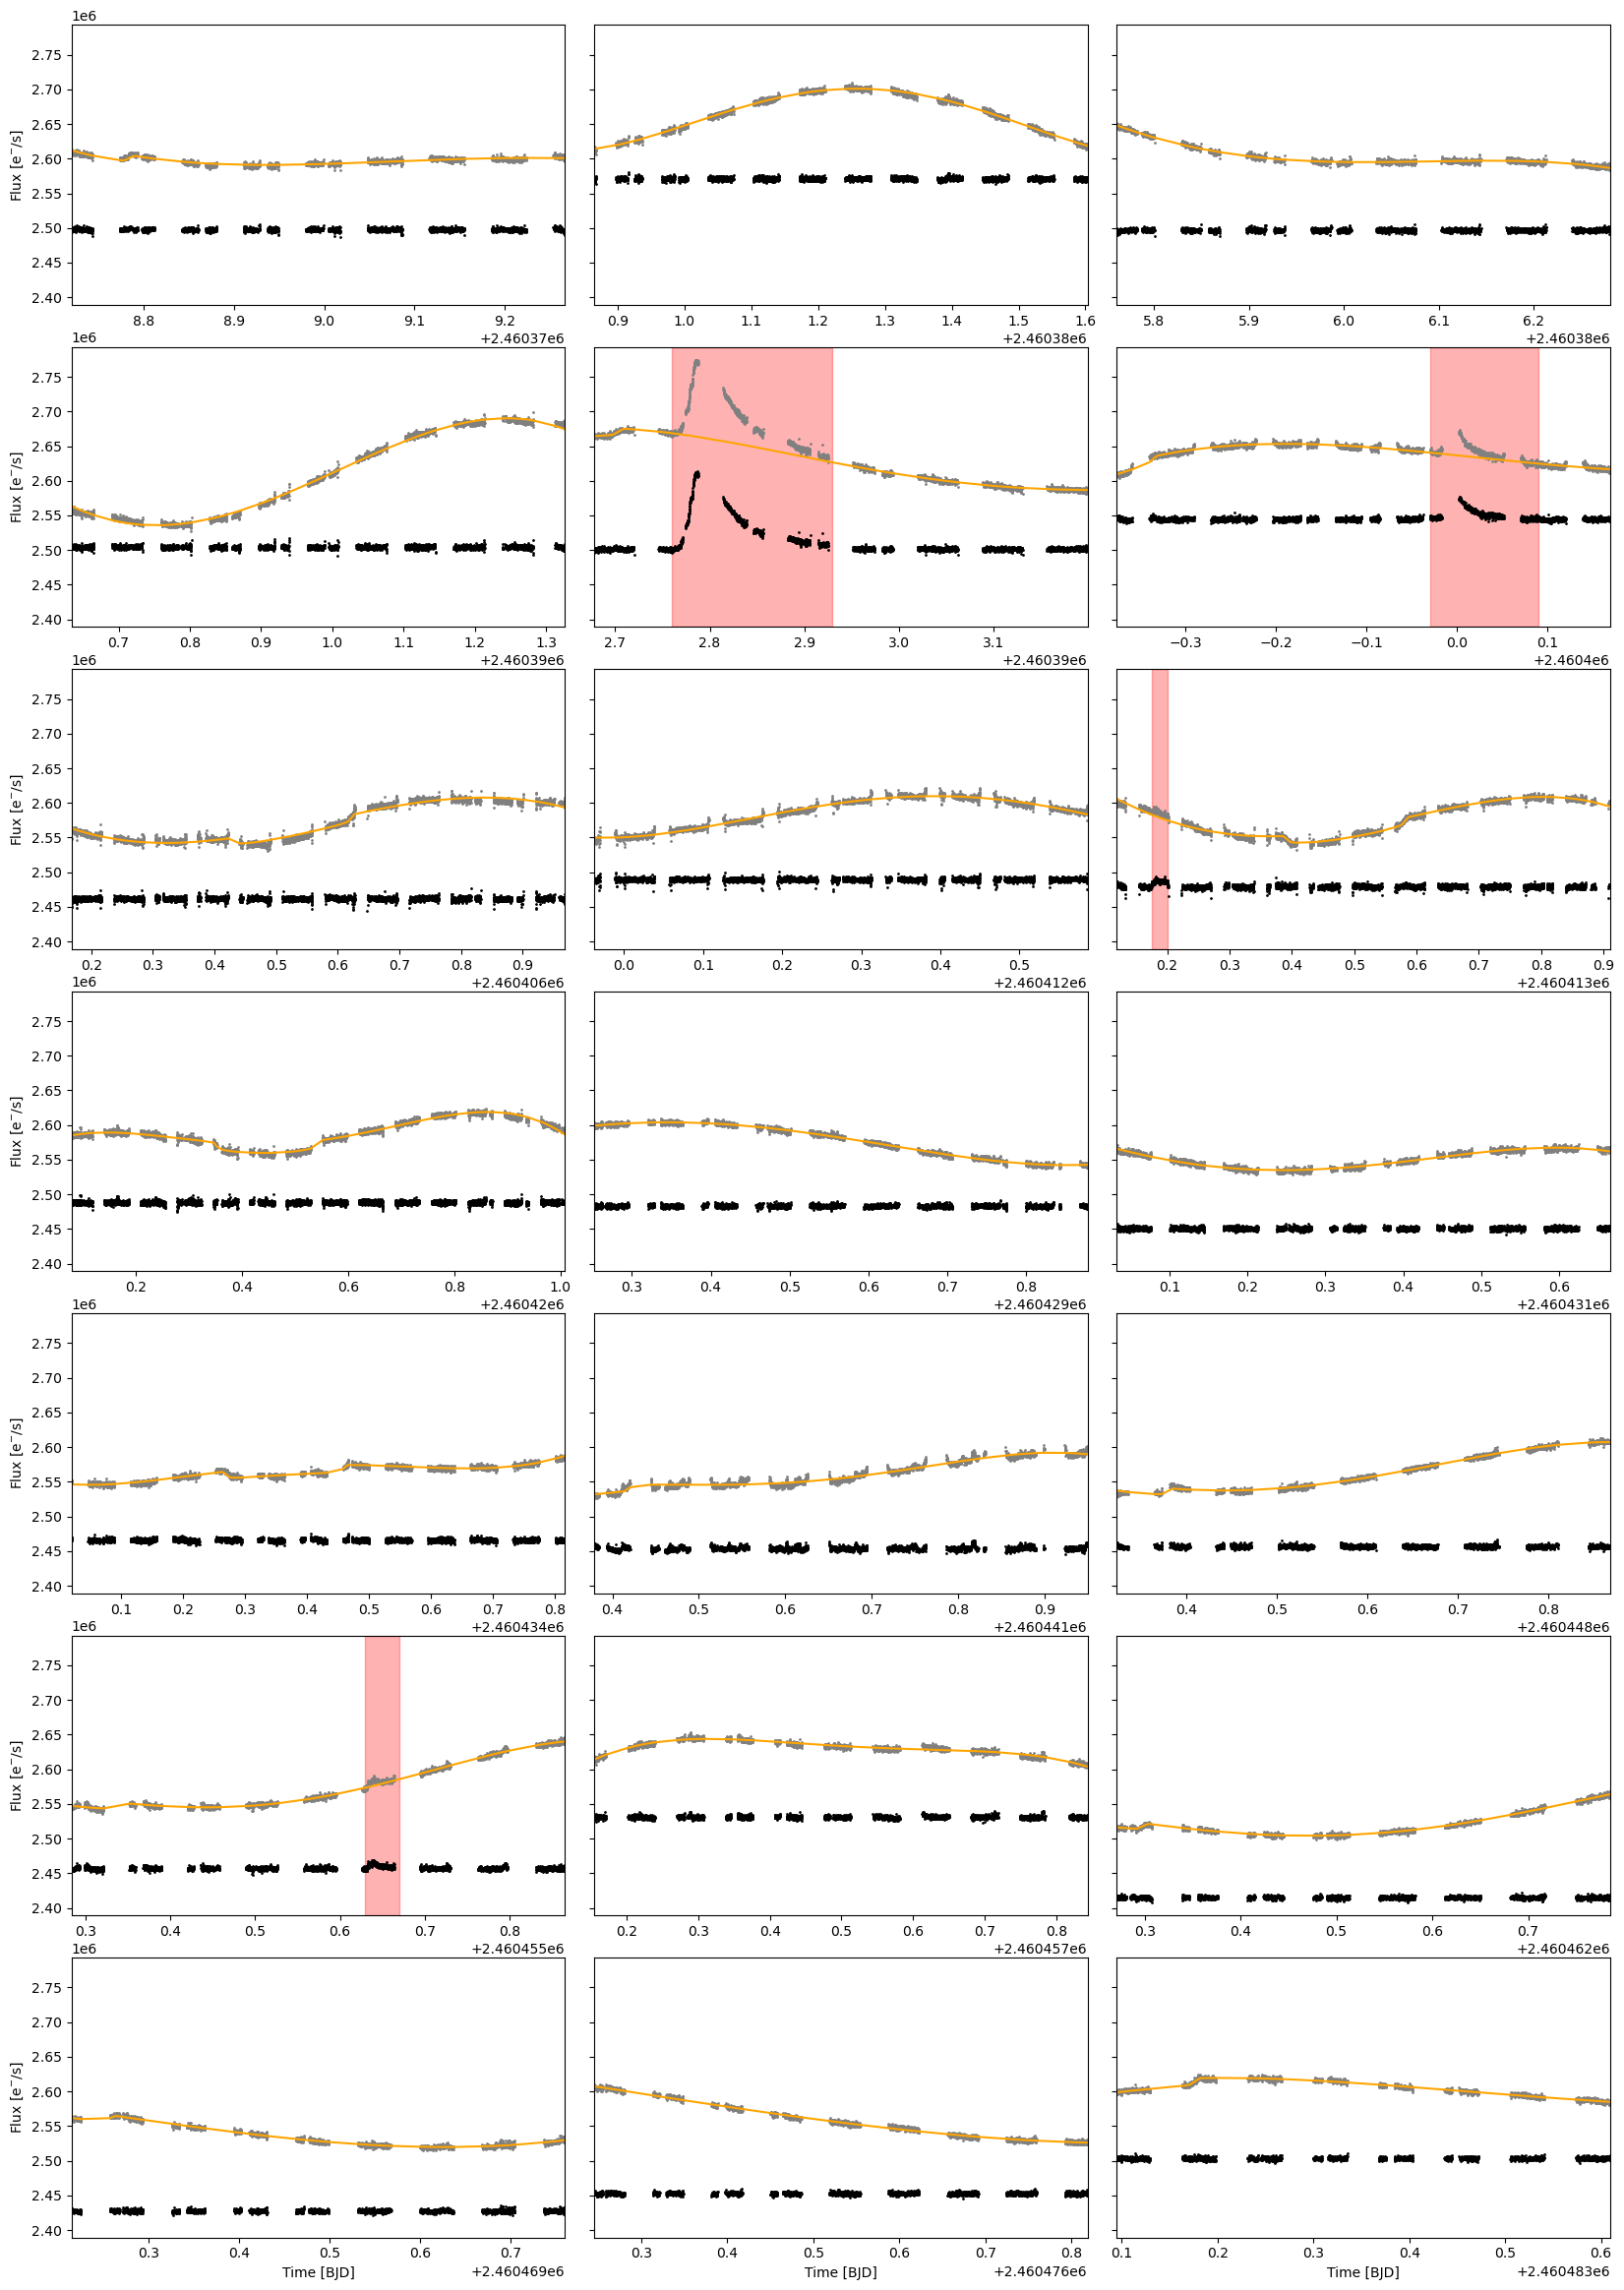

In [27]:
# make a big plot with a total of 21 subplots with two columns showing the dlcs and lcs fitting one A4 page
fig, axes = plt.subplots(7, 3, figsize=(2*8.27, 2*11.69), sharey=True)

print(len(dlcs))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(dlcs[i]["time"], dlcs[i]["flux"], s=1, color="k", label="CHEOPS")
    ax.scatter(dlcs[i-len(dlcs)]["time"], dlcs[i-len(dlcs)]["masked_raw_flux"] + 0.1e6, s=1, color="grey", label="CHEOPS")

    # plot the model, too
    ax.plot(dlcs[i-len(dlcs)]["time"], dlcs[i-len(dlcs)]["model"] + 0.1e6, color="orange", label="Model")
        
    ax.set_xlim(dlcs[i]["time"].min(), dlcs[i]["time"].max())

    # if any of the flares in the flares table are in the time range of the light curve, mark tmin-tmax with axvspan
    for flare in flares[(flares["tmin"] > dlcs[i]["time"].min()) & (flares["tmax"] < dlcs[i]["time"].max())].iterrows():
        ax.axvspan(flare[1]["tmin"], flare[1]["tmax"], color="red", alpha=0.3, zorder=-10)


# only set y label for the first column
for ax in axes[:, 0]:
    ax.set_ylabel(flux_label)

# only set x label for the last row
for ax in axes[-1, :]:
    ax.set_xlabel(time_label)

# bring the subplots closer together
plt.tight_layout()

# reduce the vertical space between subplots
plt.subplots_adjust(hspace=0.15)

# plt.savefig("../plots/paper/cheops_lc.png", dpi=300)